In [3]:
import nested_triangle as tr
import matplotlib.pyplot as plt 

fraction = 0.75
numOfTriangles = 100
numOfTrials = 50
transmissionRate = 0.7
initialRecoveryRate = 0.01
budget1 = 25
budget2 = 300

# inf1, inf2 = tr.calculateSCC(fraction, numOfTriangles, numOfTrials, transmissionRate, initialRecoveryRate, budget1, budget2)

# print(inf1)
# print(inf2)
inf1, inf2, scc_in_budget1, max_scc1_budget1, scc_out1_budget1, scc_in_budget2, max_scc1_budget2, scc_out1_budget2 = tr.calculateSCC(fraction, numOfTriangles, numOfTrials, transmissionRate, initialRecoveryRate, budget1, budget2)

print("Budget: 25")
print("Infection Size: " + str(inf1))
print("SCC IN: " + str(scc_in_budget1))
print("SCC: " + str(max_scc1_budget1))
print("SCC OUT: " + str(scc_out1_budget1))
print(" ")
print("Budget: 300")
print("Infection Size: " + str(inf2))
print("SCC IN: " + str(scc_in_budget2))
print("SCC: " + str(max_scc1_budget2))
print("SCC OUT: " + str(scc_out1_budget2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Budget: 25
Infection Size: 286.94
SCC IN: 1.2
SCC: 286.04
SCC OUT: 12.56
 
Budget: 300
Infection Size: 55.32
SCC IN: 27.78
SCC: 69.16
SCC OUT: 57.84


0
25
75
125
175
225
275
[[300, 298, 283, 1, 94, 46]]
170.33333333333334
[[0, 0, 8, 32, 113, 37]]
[[291, 269, 248, 195, 64, 47]]
[[9, 29, 35, 49, 30, 46]]
1
25
75
125
175
225
275
[[300, 298, 283, 1, 94, 46], [300, 1, 267, 245, 1, 152]]
165.66666666666666
[[0, 0, 8, 32, 113, 37], [0, 21, 9, 5, 7, 76]]
[[291, 269, 248, 195, 64, 47], [294, 262, 237, 203, 197, 122]]
[[9, 29, 35, 49, 30, 46], [6, 17, 30, 42, 39, 30]]


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

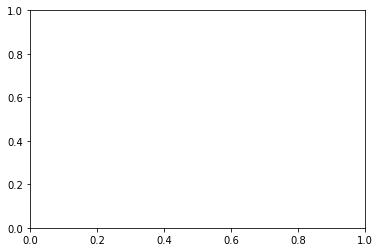

In [5]:
import nested_triangle as tr
import matplotlib.pyplot as plt 
import numpy as np

numOfTriangles = 100
fraction = 0.75
initialRecoveryRate = 0.01
budgets = [25, 75, 125, 175, 225, 275]
transmissionRate = 0.7
numOfTrails = 2

numInfected = []
sccInBudget = [] 
MaxSccBudget = []
SccOutBudget = []

for i in range(numOfTrails):
  print(i)
  num_infected = []
  scc_in_budget = [] 
  max_scc_budget = []
  scc_out_budget = []

  graph = tr.triangle(numOfTriangles)
  neighbors_per_node = tr.tuples_to_dict(graph, numOfTriangles*3)
  recovery_rates = tr.strategyFraction(fraction, initialRecoveryRate, numOfTriangles, budgets[0])

  print(budgets[0])
  node_rec_times, edge_transmit_times = tr.calculateSCC(neighbors_per_node, recovery_rates, numOfTriangles, transmissionRate, num_infected, scc_in_budget, max_scc_budget, scc_out_budget)

  for x in range(1, len(budgets)):
    print(budgets[x])
    tr.newRecoveries(initialRecoveryRate, numOfTriangles, recovery_rates, node_rec_times, budgets[x], budgets[x-1])
    tr.calculaateSCC2(numOfTriangles, neighbors_per_node, node_rec_times, edge_transmit_times, num_infected, scc_in_budget, max_scc_budget, scc_out_budget)

  numInfected.append(num_infected)
  sccInBudget.append(scc_in_budget)
  MaxSccBudget.append(max_scc_budget)
  SccOutBudget.append(scc_out_budget)
  
  print(np.mean(numInfected))

  print(numInfected)
  print(sccInBudget)
  print(MaxSccBudget)
  print(SccOutBudget)

plt.plot(budgets, np.mean(numInfected), label="Infection Size")
plt.plot(budgets, np.mean(sccInBudget), label="SCC In")
plt.plot(budgets, np.mean(MaxSccBudget), label="SCC Budget")
plt.plot(budgets, np.mean(SccOutBudget), label="SCC Out")
